In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog vs Cat Dataset from Kaggle

In [4]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 89% 721M/812M [00:03<00:02, 47.1MB/s]
100% 812M/812M [00:04<00:00, 211MB/s] 


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
# extracting the zip file.
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# extracting the train zip file.
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
# counting the number of files in train folde

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images in train:' , file_count)

Number of images in train: 25000


Printing the name of images

In [9]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.1284.jpg', 'cat.370.jpg', 'cat.902.jpg', 'dog.2602.jpg', 'dog.5682.jpg', 'cat.6113.jpg', 'cat.2275.jpg', 'cat.2297.jpg', 'cat.182.jpg', 'dog.5068.jpg', 'dog.4228.jpg', 'dog.6558.jpg', 'cat.698.jpg', 'dog.12215.jpg', 'cat.1651.jpg', 'cat.5020.jpg', 'dog.8126.jpg', 'cat.5408.jpg', 'cat.9245.jpg', 'cat.12489.jpg', 'dog.10258.jpg', 'cat.7161.jpg', 'dog.10672.jpg', 'cat.5245.jpg', 'cat.824.jpg', 'dog.9588.jpg', 'dog.6741.jpg', 'cat.6489.jpg', 'cat.10901.jpg', 'cat.10203.jpg', 'dog.4194.jpg', 'cat.10780.jpg', 'cat.12329.jpg', 'cat.7694.jpg', 'cat.2704.jpg', 'dog.10768.jpg', 'dog.11420.jpg', 'dog.10732.jpg', 'cat.10395.jpg', 'dog.8166.jpg', 'cat.2814.jpg', 'cat.341.jpg', 'cat.2227.jpg', 'dog.7804.jpg', 'cat.5286.jpg', 'cat.5679.jpg', 'dog.7529.jpg', 'cat.439.jpg', 'cat.11753.jpg', 'dog.2684.jpg', 'dog.1669.jpg', 'cat.3500.jpg', 'dog.11508.jpg', 'dog.10186.jpg', 'cat.347.jpg', 'dog.10830.jpg', 'cat.29.jpg', 'dog.8946.jpg', 'dog.4212.jpg', 'dog.1053.jpg', 'dog.2145.jpg', 'cat.9920.jpg', '

Importing Dependencies

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

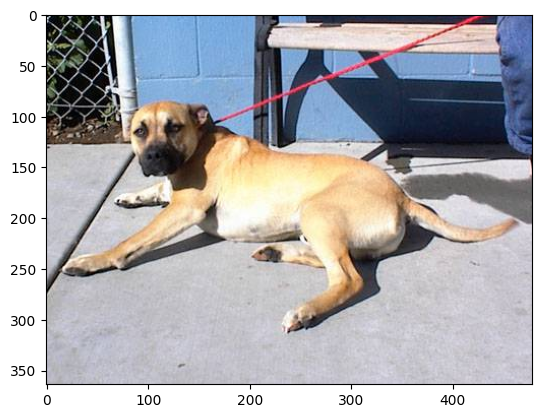

In [11]:
img = mpimg.imread('/content/train/dog.10718.jpg')
plt.imshow(img)

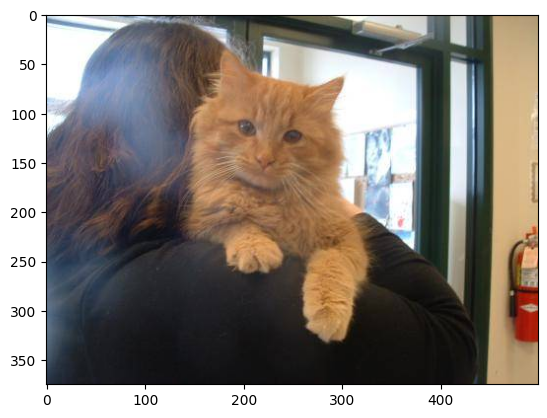

In [12]:
img = mpimg.imread('/content/train/cat.5484.jpg')
plt.imshow(img)

In [13]:
file_names

['cat.1284.jpg',
 'cat.370.jpg',
 'cat.902.jpg',
 'dog.2602.jpg',
 'dog.5682.jpg',
 'cat.6113.jpg',
 'cat.2275.jpg',
 'cat.2297.jpg',
 'cat.182.jpg',
 'dog.5068.jpg',
 'dog.4228.jpg',
 'dog.6558.jpg',
 'cat.698.jpg',
 'dog.12215.jpg',
 'cat.1651.jpg',
 'cat.5020.jpg',
 'dog.8126.jpg',
 'cat.5408.jpg',
 'cat.9245.jpg',
 'cat.12489.jpg',
 'dog.10258.jpg',
 'cat.7161.jpg',
 'dog.10672.jpg',
 'cat.5245.jpg',
 'cat.824.jpg',
 'dog.9588.jpg',
 'dog.6741.jpg',
 'cat.6489.jpg',
 'cat.10901.jpg',
 'cat.10203.jpg',
 'dog.4194.jpg',
 'cat.10780.jpg',
 'cat.12329.jpg',
 'cat.7694.jpg',
 'cat.2704.jpg',
 'dog.10768.jpg',
 'dog.11420.jpg',
 'dog.10732.jpg',
 'cat.10395.jpg',
 'dog.8166.jpg',
 'cat.2814.jpg',
 'cat.341.jpg',
 'cat.2227.jpg',
 'dog.7804.jpg',
 'cat.5286.jpg',
 'cat.5679.jpg',
 'dog.7529.jpg',
 'cat.439.jpg',
 'cat.11753.jpg',
 'dog.2684.jpg',
 'dog.1669.jpg',
 'cat.3500.jpg',
 'dog.11508.jpg',
 'dog.10186.jpg',
 'cat.347.jpg',
 'dog.10830.jpg',
 'cat.29.jpg',
 'dog.8946.jpg',
 'dog.42

In [14]:

for i in range(5):

  name = file_names[i]
  print(name[0:3])


cat
cat
cat
dog
dog


In [15]:
dog_count=0
cat_count=0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print(dog_count,' : dog count')
print(cat_count,' : cat count')

12500  : dog count
12500  : cat count


**Resizing all the images to same scale**

In [16]:
# Creating a directory for resized images
os.mkdir('/content/resized_images')

In [17]:
original_folder = '/content/train/'
resized_folder = '/content/resized_images/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImagPath = resized_folder+filename
  img.save(newImagPath)

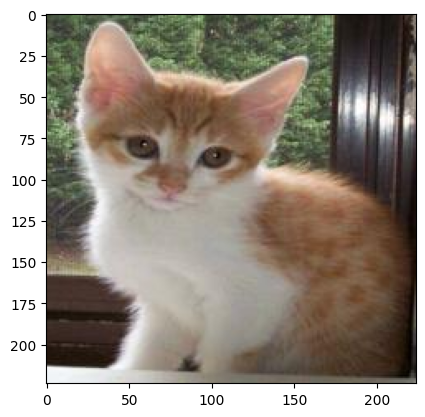

In [20]:
img = mpimg.imread('/content/resized_images/cat.10146.jpg')
plt.imshow(img)

**Creating labels for resized images of dogs and cats**

Cat --->0<br>
Dog --->1

In [21]:
# Creating for loop to assign labels
filenames =os.listdir('/content/resized_images')
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [22]:
filenames[0:5]

['cat.1284.jpg', 'cat.370.jpg', 'cat.902.jpg', 'dog.2602.jpg', 'dog.5682.jpg']

In [23]:
labels[0:5]

[0, 0, 0, 1, 1]

In [24]:
# counting the images of dogs and cats in resized_image folder

In [25]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1016  984]


Converting all the resized images to numpy array

In [26]:
import cv2
import glob

In [44]:
image_directory = '/content/resized_images/'
image_extensions= ['png','jpg']

In [45]:
files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]

dog_cat_images = np.asarray([cv2.imread(file) for file in files]) #converting images into numpy array

In [52]:
dog_cat_images

array([[[[135, 139, 127],
         [147, 151, 139],
         [143, 145, 133],
         ...,
         [  2,   1,   5],
         [  4,   1,  10],
         [  2,   0,   8]],

        [[136, 140, 128],
         [149, 153, 141],
         [147, 149, 137],
         ...,
         [  2,   1,   5],
         [  5,   2,  11],
         [  2,   0,   8]],

        [[136, 140, 128],
         [151, 155, 143],
         [151, 153, 141],
         ...,
         [  2,   1,   5],
         [  5,   2,  11],
         [  3,   0,   9]],

        ...,

        [[204, 204, 186],
         [206, 206, 188],
         [197, 197, 179],
         ...,
         [173, 176, 167],
         [172, 175, 166],
         [174, 177, 168]],

        [[193, 193, 175],
         [196, 196, 178],
         [191, 191, 173],
         ...,
         [175, 178, 169],
         [171, 174, 165],
         [172, 175, 166]],

        [[181, 181, 163],
         [187, 187, 169],
         [186, 186, 168],
         ...,
         [184, 187, 178],
        

In [53]:
type(dog_cat_images)

numpy.ndarray

In [54]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [55]:
X = dog_cat_images
Y = np.asarray(labels)

**Applying train test split**

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(2000, 224, 224, 3)
(1600, 224, 224, 3)
(400, 224, 224, 3)


In [58]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [59]:
X_train_scaled

array([[[[0.45098039, 0.50588235, 0.55294118],
         [0.42352941, 0.48627451, 0.5372549 ],
         [0.35686275, 0.41176471, 0.48235294],
         ...,
         [0.23529412, 0.4       , 0.51372549],
         [0.22745098, 0.39215686, 0.50588235],
         [0.22352941, 0.38823529, 0.50196078]],

        [[0.47058824, 0.51764706, 0.56470588],
         [0.43137255, 0.48627451, 0.53333333],
         [0.38039216, 0.43529412, 0.50588235],
         ...,
         [0.22745098, 0.39215686, 0.50588235],
         [0.22745098, 0.39215686, 0.50588235],
         [0.22352941, 0.38823529, 0.50196078]],

        [[0.47843137, 0.51764706, 0.55686275],
         [0.42745098, 0.4745098 , 0.51372549],
         [0.40392157, 0.4627451 , 0.5254902 ],
         ...,
         [0.22352941, 0.38823529, 0.50196078],
         [0.22352941, 0.38823529, 0.50196078],
         [0.22352941, 0.38823529, 0.50196078]],

        ...,

        [[0.50588235, 0.54901961, 0.58039216],
         [0.49803922, 0.54117647, 0.57254902]

**Building Neural Network**

In [60]:
import tensorflow as tf
import tensorflow_hub as hub

In [77]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [78]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [80]:
!pip install tf_keras
import tf_keras

In [81]:
num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [86]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [89]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 8s 40ms/step - loss: 0.1811 - acc: 0.9244
Epoch 2/5
50/50 [==============================] - 2s 42ms/step - loss: 0.0637 - acc: 0.9825
Epoch 3/5
50/50 [==============================] - 2s 42ms/step - loss: 0.0514 - acc: 0.9831
Epoch 4/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0419 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0327 - acc: 0.9906


In [90]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss = ', score)
print('Test Accuracy = ', acc)

13/13 [==============================] - 2s 70ms/step - loss: 0.0768 - acc: 0.9750
Test Loss =  0.07682539522647858
Test Accuracy =  0.9750000238418579


**Predictive System**

Path of the image to be predicted: /content/cat.jpg


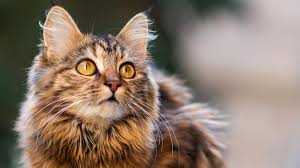

1/1 [==============================] - 0s 21ms/step
[[ 2.773446  -1.8697644]]
0
The image represents a Cat


In [92]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3]) # prediction of only 1 image with (224,224,3)

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


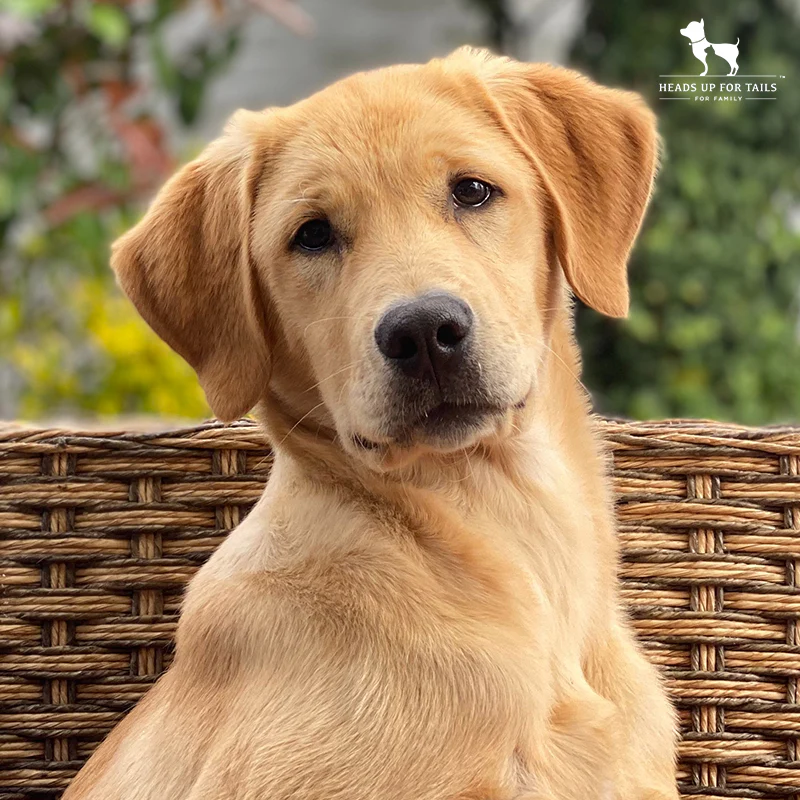

1/1 [==============================] - 0s 31ms/step
[[-4.0089192  4.6143007]]
1
The image represents a Dog


In [93]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3]) # prediction of only 1 image with (224,224,3)

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')